# Распознавание рукописных цифр

Воспользуемся выборкой из уже подготовленной БД изображений:

MNIST – (Modified National Institute of Standards and Technology)

60 000 изображений в обучающей выборке и 10 000 – в тестовой.
Каждое изображение имеет размер 28х28 пикселей и представлено в градациях серого, т.е. каждый пиксел имеет значение от 0 до 255 (0 – черный цвет, 255 – белый):

* x_train – изображения цифр обучающей выборки;
* y_train – вектор соответствующих значений цифр (например, если на i-м изображении нарисована 5, то  y_train[i] = 5);
* x_test – изображения цифр тестовой выборки;
* y_test – вектор соответствующих значений цифр для тестовой выборки.

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# отображение первых 25 изображений из обучающей выборки
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
 
plt.show()

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


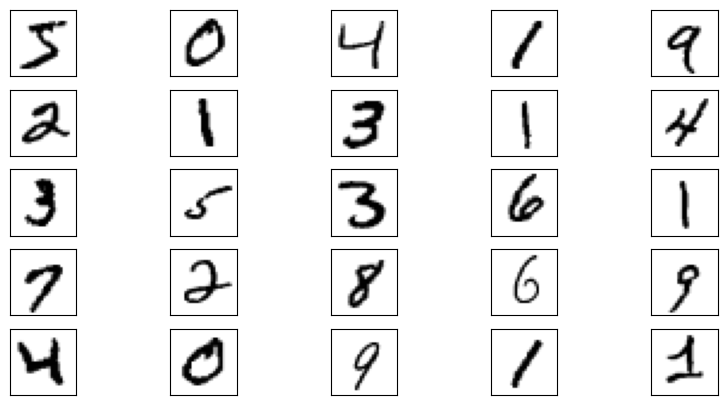

In [3]:
# отображение первых 25 изображений из обучающей выборки
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
 
plt.show()

Соберем обычную полносвязную ИНС с
* 28 x 28 = 784 входами;
* 128 нейронами скрытого слоя + bias;
* 10 нейронами выходного слоя + bias.

In [4]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
 
print(model.summary())     # вывод структуры НС в консоль

d:\git\image_processing\.venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

None


### Cтандартизация входных данных
каждое значение тензоров x_train и x_test будет делиться на максимальное число 255, которое они могут принимать. На выходе получим вещественные величины от 0 до 1.

In [5]:
x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train_cat, batch_size=32, epochs=10, validation_split=0.2)

На выходе ожидаем вектор с 1 на месте соответствующего числа, т.к. наша НС имеет 10 выходов, и каждый выход будет соответствовать определенной цифре: от 0 до 9.

Воспользуемся стандартной функцией Keras:

In [6]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

Для задачи классификации стоит выбрать функцию потерь категориальной кросс-энтропии - categorical_crossentropy.

Построить алгоритм минимизации процента ошибок распознавания цифр сложно (если вообще возможно), поэтому мы привязываемся к более простому с точки зрения математики критерию – категориальной кросс-энтропии (S), минимизируя которую, надеемся, что будет уменьшаться и процент ошибок. 
$${Q(S(y), L)=-\sum_i(L_i*log(S_i))}$$



In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Обучим модель
* batch_size = 32 – это размер батча (32 картинки), после которых будет выполняться корректировка весов;
* validation_split = 0,2 – разбиение обучающей выборки на собственно обучающую и проверочную. Значение 0,2 определяет, что для каждой эпохи 20% случайных картинок из обучающей выборки будут помещаться в выборку валидации.

In [8]:
model.fit(x_train, y_train_cat, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8584 - loss: 0.4887 - val_accuracy: 0.9562 - val_loss: 0.1575
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9592 - loss: 0.1388 - val_accuracy: 0.9657 - val_loss: 0.1197
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9727 - loss: 0.0924 - val_accuracy: 0.9693 - val_loss: 0.1014
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9808 - loss: 0.0661 - val_accuracy: 0.9697 - val_loss: 0.1025
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9849 - loss: 0.0502 - val_accuracy: 0.9698 - val_loss: 0.1000
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9871 - loss: 0.0407 - val_accuracy: 0.9688 - val_loss: 0.1045
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9911 - loss: 0.0290 - val_accuracy: 0.9714 - val_loss: 0.1032
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9917 - loss: 0.0266 - 

Проверка

In [9]:
model.evaluate(x_test, y_test_cat)
# Контроль по примеру
n = 3
plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print( res )

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9677 - loss: 0.1178


[0.1001734733581543, 0.9731000065803528]

Контроль по примеру

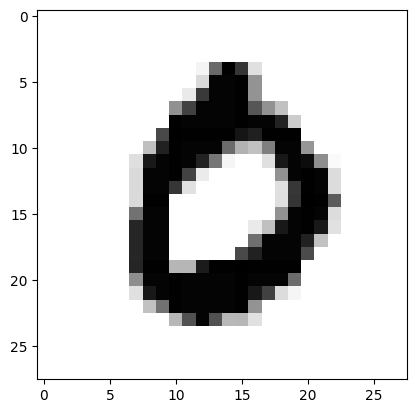

In [10]:
n = 3
plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

In [11]:
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print( res )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
[[9.99994874e-01 3.44603382e-12 5.06633796e-06 1.30963754e-10
  1.07035165e-10 5.50752055e-10 1.02183568e-08 1.33082045e-09
  5.85256930e-12 3.72570086e-10]]


In [12]:
print( np.argmax(res) )

0


Пропустим через НС всю тестовую выборку и векторы выходных значений преобразуем в числа от 0 до 9:

In [13]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)
 
print(pred.shape)
 
print(pred[:20])
print(y_test[:20])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000,)
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


# Все ли картинки распознаются верно?

Затем, сформируем маску, которая будет содержать True для верных вариантов и False – для неверных. И с помощью этой маски выделим из тестовой выборки все неверные результаты:

In [14]:
mask = pred == y_test
print(mask[:10])
 
x_false = x_test[~mask]
y_false = x_test[~mask]
 
print(x_false.shape)

[ True  True  True  True  True  True  True  True False  True]
(269, 28, 28)


И выведем первые 5 из них на экран:

Значение сети: 7


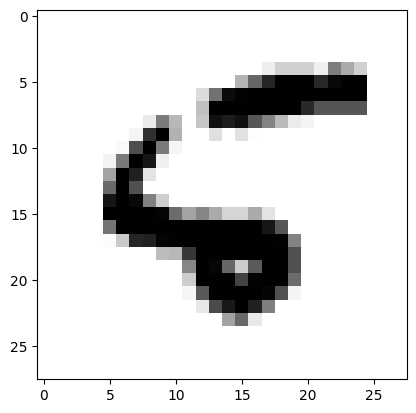

Значение сети: 2


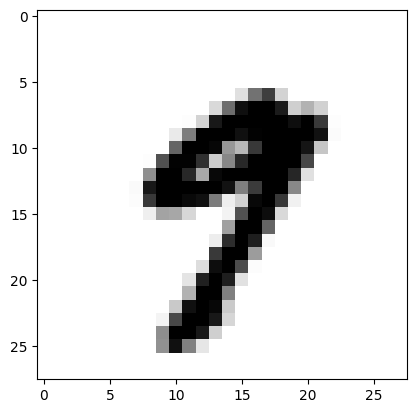

Значение сети: 1


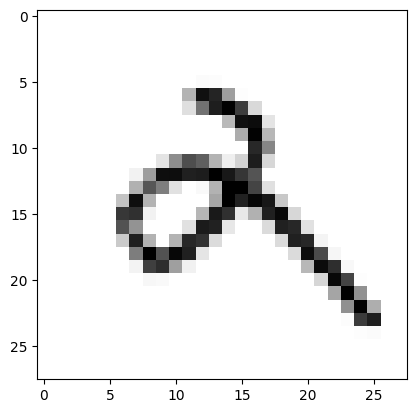

Значение сети: 0


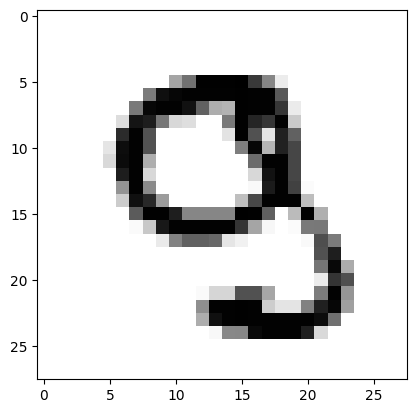

Значение сети: 4


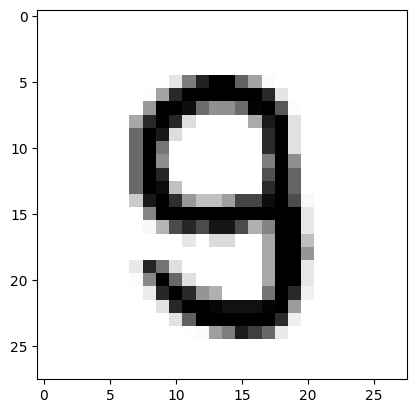

In [15]:
for i in range(5):
  print("Значение сети: "+str(y_test[i]))
  plt.imshow(x_false[i], cmap=plt.cm.binary)
  plt.show()